<a href="https://colab.research.google.com/github/RuperttAryeenWind/datascience/blob/master/machine-learning/courses/linkedin_ai/day1/Overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This note book is a demonstratation of over fit or excess generalization error.  

Learning to take away:
    
    Normally when we add more training data our model performs slightly *worse* on the new training data and hopefully better on test data.
    
We informally say "when we over-fit our model looks bad in production". What really happened is: our model looked too good during training.  Luck worked against us.

First we are going to set up a synthetic data set.  The advantages of synthetic data include:

  * It is easy to acquire.
  * We can design it so we know the right answer.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

!pip install scipy==1.2.1
# https://github.com/jupyter/notebook/issues/3523#issuecomment-386246823

import numpy
import pandas
import matplotlib
import seaborn
import sklearn.linear_model
import scipy
import statsmodels.api

numpy.random.seed(2018)

def mk_data(n_noise, n_signal, n_row):
    strength = 5/n_signal
    df = pandas.DataFrame(data = { 'y': numpy.random.normal(0, 1, n_row)})
    for i in range(n_signal):
        vname = "var_" + str(i).zfill(4)
        df[vname] = numpy.random.normal(0, 1, n_row)
        df['y'] = df['y'] + strength*df[vname]
    for i in range(n_noise):
        vname = "noise_" + str(i).zfill(4)
        df[vname] = numpy.random.normal(0, 1, n_row)
    return(df)

df = mk_data(250, 50, 1000)
vars = list(set(df.columns.values) - set(['y']))
vars.sort()

df['is_train'] = numpy.random.uniform(0, 1, df.shape[0])>=0.2
df_train = df[df['is_train']]

Let's first work "like a statistician".  Fit the model and use detailed model diagnostics to help us.


You want the t to be as small as possible, where : t = coeff / std_err.



In [2]:
model = statsmodels.api.OLS(
    df_train["y"], 
    statsmodels.api.add_constant(df_train.loc[:, vars])).fit()
model.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2.390
Date:                Wed, 22 May 2019   Prob (F-statistic):           6.65e-18
Time:                        08:15:04   Log-Likelihood:                -887.23
No. Observations:                 784   AIC:                             2376.
Df Residuals:                     483   BIC:                             3780.
Df Model:                         300                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.043     -0.292      0.771      -0.097       0.072
noise_0000     0.0522      0.043      1.208      0.227      -0.033       0.137
noise_0001     0.0653      0.043      1.521      0.129      -0.019       0.150
noise_0002     0.0153      0.043      0.353      0.724      -0.070       0.101
noise_0003    -0.0425      0.045     -0.947      0.344      -0.131       0.046
noise_0004     0.0255      0.043      0.587      0.557      -0.060       0.111
noise_0005    -0.0207      0.043     -0.485      0.628      -0.104       0.063
noise_0006    -0.0688      0.042     -1.650      0.099      -0.151       0.013
noise_0007     0.0211      0.044      0.483      0.629      -0.065       0.107
noise_0008     0.0187      0.043      0.430      0.667      -0.067       0.104
noise_0009     0.0123      0.046      0.271      0.787      -0.077       0.102
noise_0010    -0.0084      0.044     -0.192      0.848      -0.094       0.078
noise_0011     0.0696      0.043      1.601      0.110      -0.016       0.155
noise_0012     0.0789      0.042      1.869      0.062      -0.004       0.162
noise_0013     0.0492      0.044      1.111      0.267      -0.038       0.136
noise_0014     0.0466      0.046      1.016      0.310      -0.044       0.137
noise_0015    -0.0022      0.042     -0.052      0.958      -0.086       0.081
noise_0016    -0.0303      0.043     -0.703      0.482      -0.115       0.054
noise_0017     0.0976      0.044      2.199      0.028       0.010       0.185
noise_0018    -0.0277      0.044     -0.623      0.533      -0.115       0.060
noise_0019     0.0289      0.043      0.666      0.506      -0.056       0.114
noise_0020     0.0604      0.042      1.431      0.153      -0.023       0.143
noise_0021    -0.0422      0.042     -0.994      0.321      -0.126       0.041
noise_0022    -0.0794      0.044     -1.809      0.071      -0.166       0.007
noise_0023    -0.0584      0.044     -1.334      0.183      -0.144       0.028
noise_0024     0.0093      0.042      0.220      0.826      -0.074       0.092
noise_0025     0.0047      0.046      0.101      0.920      -0.086       0.096
noise_0026     0.0779      0.045      1.724      0.085      -0.011       0.167
noise_0027    -0.0232      0.045     -0.516      0.606      -0.112       0.065
noise_0028     0.0444      0.046      0.974      0.330      -0.045       0.134
noise_0029     0.0665      0.042      1.573      0.116      -0.017       0.150
noise_0030     0.0074      0.044      0.169      0.866      -0.079       0.093
noise_0031     0.0584      0.044      1.313      0.190      -0.029       0.146
noise_0032     0.0492      0.042      1.175      0.241      -0.033       0.132
noise_0033    -0.0574      0.042     -1.352      0.177      -0.141       0.026
noise_0034     0.0150      0.043      0.348      0.728      -0.070       0.100
no

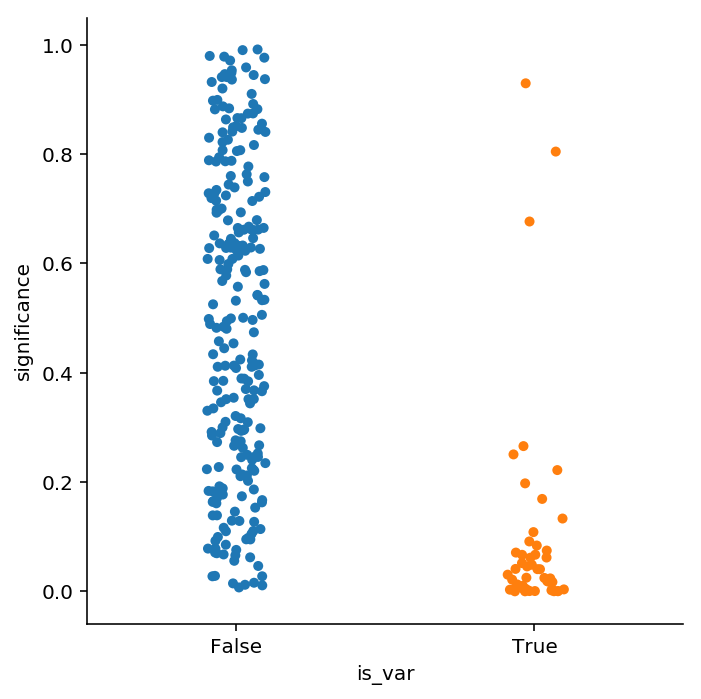

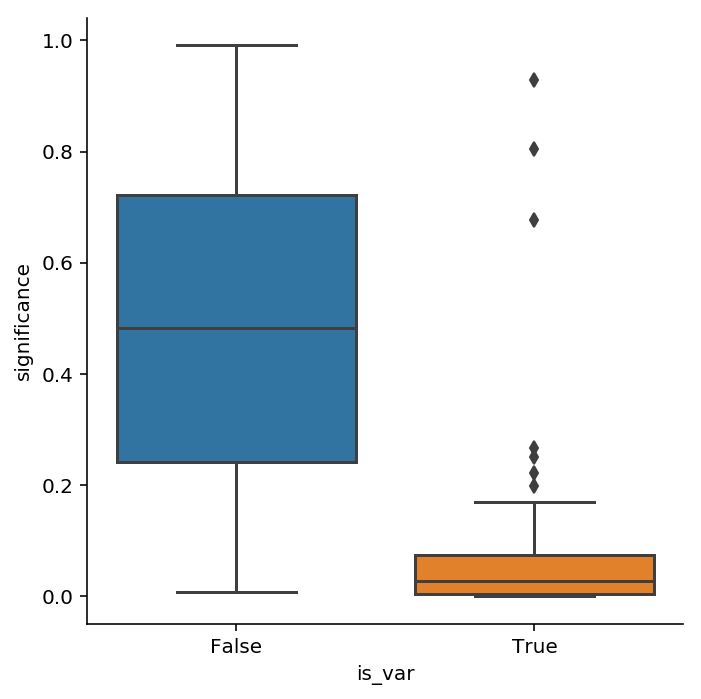

In [3]:
pvalues = pandas.DataFrame(model.pvalues)
pvalues = pvalues.reset_index()
pvalues.columns = ['variable', 'significance']
pvalues = pvalues[pvalues['variable']!='const']
pvalues['is_var'] = [vi.startswith("var_") for vi in pvalues['variable']]
seaborn.catplot(x = "is_var", y = "significance", data = pvalues)
seaborn.catplot(x = "is_var", y = "significance", data = pvalues, kind = "box")

It changes from hard to easy to identify signal carrying variables as the amount of available data increases.  We can try picking by p-values or by effect sizes to filter down to the real variables.  However, the problem is there are so many more noise variables than signal carying variables- so many of the bad variables cross a given threshold.

In [4]:
pvs = list(pvalues['significance'])
pvs.sort()
threshold = pvs[50]
print(threshold)
pvalues['take'] = pvalues['significance'] < threshold
pandas.crosstab(pvalues['take'], pvalues['is_var'])

0.07094023830406766


is_var,False,True
take,,
False,236,14
True,14,36


In [5]:
chosen_vars = list(pvalues['variable'][pvalues['take']])
print(len(chosen_vars))
chosen_vars

50


['noise_0012',
 'noise_0017',
 'noise_0049',
 'noise_0066',
 'noise_0069',
 'noise_0086',
 'noise_0088',
 'noise_0120',
 'noise_0162',
 'noise_0207',
 'noise_0217',
 'noise_0220',
 'noise_0236',
 'noise_0247',
 'var_0000',
 'var_0001',
 'var_0002',
 'var_0003',
 'var_0004',
 'var_0005',
 'var_0009',
 'var_0010',
 'var_0011',
 'var_0012',
 'var_0014',
 'var_0015',
 'var_0017',
 'var_0018',
 'var_0019',
 'var_0020',
 'var_0021',
 'var_0022',
 'var_0023',
 'var_0025',
 'var_0027',
 'var_0028',
 'var_0029',
 'var_0030',
 'var_0031',
 'var_0032',
 'var_0036',
 'var_0037',
 'var_0038',
 'var_0041',
 'var_0043',
 'var_0044',
 'var_0045',
 'var_0047',
 'var_0048',
 'var_0049']

We will show knowing which variables are valid is a big hint.


Now we fit a model on the training data.

In [0]:
model_all = sklearn.linear_model.LinearRegression(
        fit_intercept = True).fit(df_train.loc[:, vars],
        df_train["y"])
df['predict_all'] = model_all.predict(df.loc[:, vars])


Let's take a look at the quality of the fit.

is_train
False    1.739412
True     0.562965
Name: square_error_all, dtype: float64


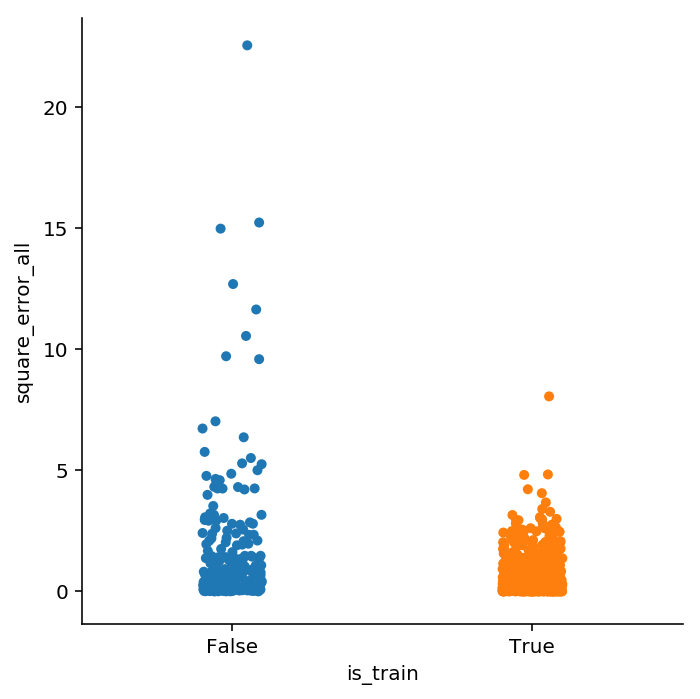

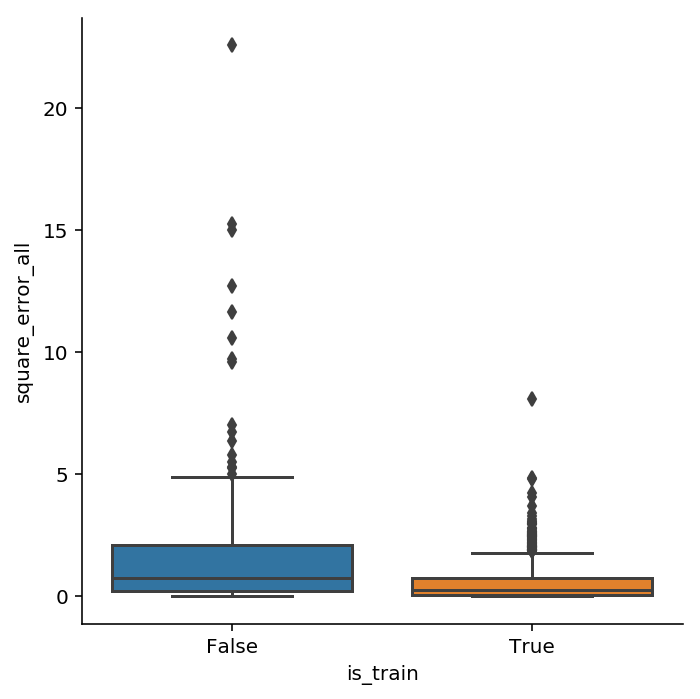

In [8]:
df['square_error_all']  = (df['y'] - df['predict_all'])**2
seaborn.catplot(x = "is_train", y = "square_error_all", data = df)
seaborn.catplot(x = "is_train", y = "square_error_all", data = df, kind = "box")
print(df.groupby(['is_train'])['square_error_all'].mean())

is_train
False    1.331993
True     0.868098
Name: square_error_chosen, dtype: float64

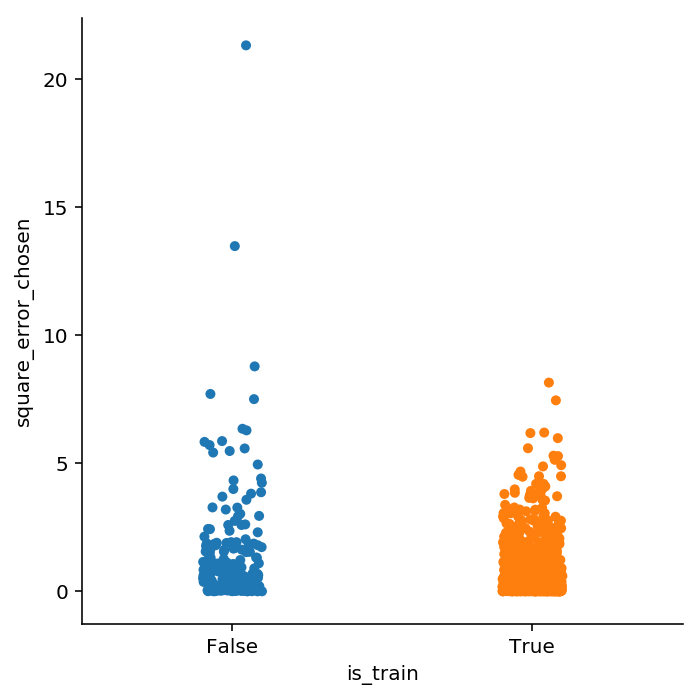

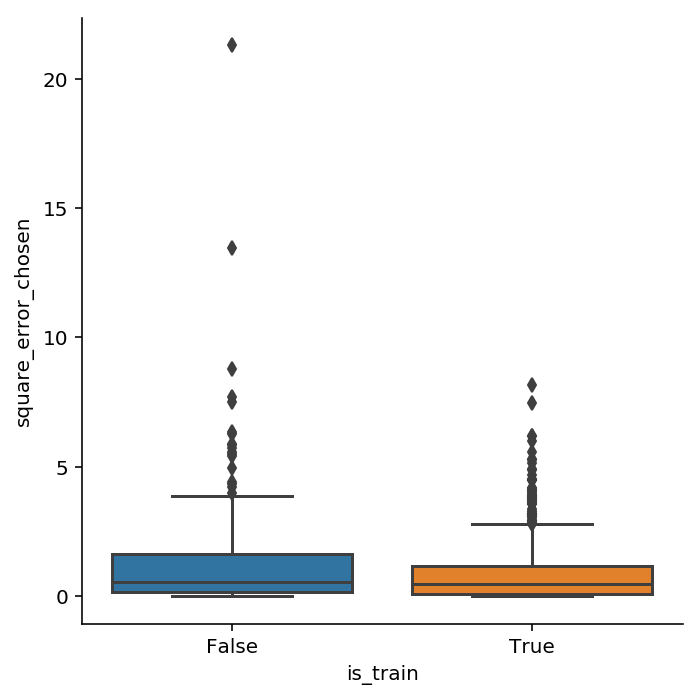

In [9]:
model_chosen = sklearn.linear_model.LinearRegression(
        fit_intercept = True).fit(df_train.loc[:, chosen_vars],
        df_train["y"])
df['predict_chosen'] = model_chosen.predict(df.loc[:, chosen_vars])

df['square_error_chosen']  = (df['y'] - df['predict_chosen'])**2
seaborn.catplot(x = "is_train", y = "square_error_chosen", data = df)
seaborn.catplot(x = "is_train", y = "square_error_chosen", data = df, kind = "box")
df.groupby(['is_train'])['square_error_chosen'].mean()

Notice picking variables increased our error on training.  It *has* to do this as the model with all variables can't be worse than the limited model on training data.  But also notice this more limited model performed better on held-out (is_train = False) data.  This held-out data is presumably the better simulation of applying the model to future new data- so we have probably improved things.

Note: the very act of picking variables itself leads to overfit! This is called Freedman's paradox but it is also attributable to repeated experiment bias.


Let's now look at how perfect variable selection would perform.

is_train
False    1.129221
True     0.893151
Name: square_error_vars, dtype: float64

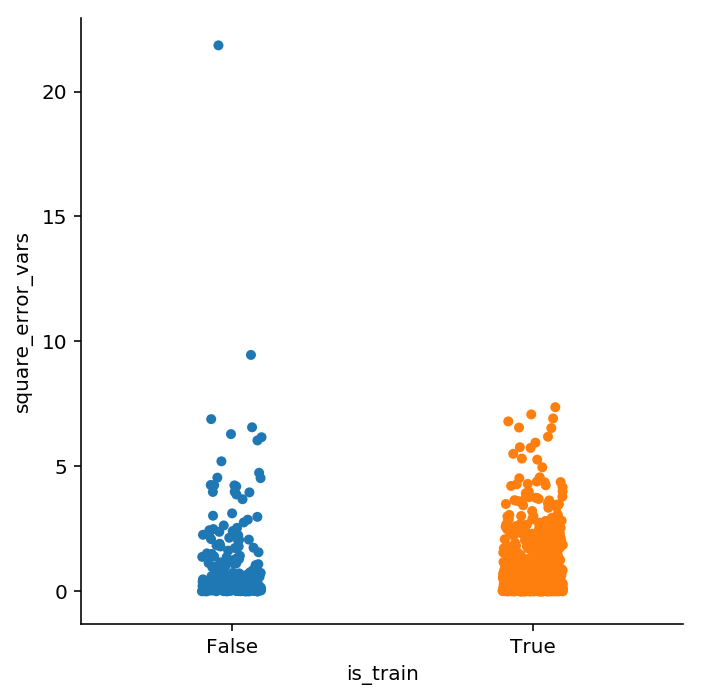

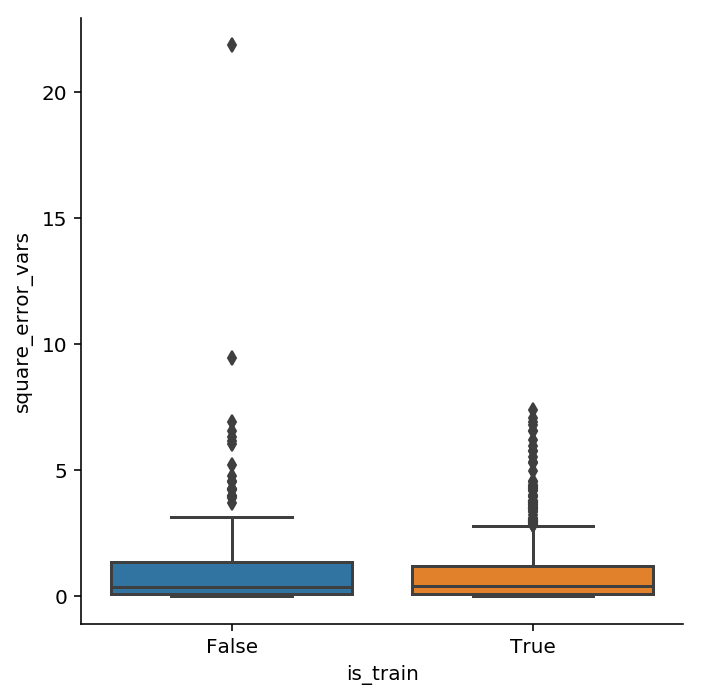

In [11]:
true_vars = [vi for vi in vars if vi.startswith("var_")]
model_vars = sklearn.linear_model.LinearRegression(
        fit_intercept = True).fit(df_train.loc[:, true_vars],
        df_train["y"])
df['predict_vars'] = model_vars.predict(df.loc[:, true_vars])

df['square_error_vars']  = (df['y'] - df['predict_vars'])**2
seaborn.catplot(x = "is_train", y = "square_error_vars", data = df)
seaborn.catplot(x = "is_train", y = "square_error_vars", data = df, kind = "box")
df.groupby(['is_train'])['square_error_vars'].mean()

Notice the train is FALSE error is best when we know the variables.